In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("../data_cleaning/df_cleaned.csv")


In [22]:
df.head()

,airline,embarked,destination,Route,stops,journey_year,journey_month,journey_day,weekday,dep_hour,...,departure_period,Arrival_hour,Arrival_min,arrival_period,Arrived_next_day,duration_hours,duration_mins,Duration_in_mins,price,additional_info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,2019,3,24,6,22,...,night,1,10,late night,True,2,50,170,3898,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,2019,1,5,5,5,...,early morning,13,15,After noon,False,7,25,445,7663,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,2019,9,6,4,9,...,morning,4,25,late night,True,19,0,1140,13883,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,2019,12,5,3,18,...,evening,23,30,night,False,5,25,325,6219,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,2019,1,3,3,16,...,After noon,21,35,night,False,4,45,285,13303,No info


In [23]:
df.shape

(10462, 21)

In [24]:
df.columns

Index(['airline', 'embarked', 'destination', 'Route', 'stops', 'journey_year',
       'journey_month', 'journey_day', 'weekday', 'dep_hour', 'dep_min',
       'departure_period', 'Arrival_hour', 'Arrival_min', 'arrival_period',
       'Arrived_next_day', 'duration_hours', 'duration_mins',
       'Duration_in_mins', 'price', 'additional_info'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   airline           10462 non-null  object
 1   embarked          10462 non-null  object
 2   destination       10462 non-null  object
 3   Route             10462 non-null  object
 4   stops             10462 non-null  object
 5   journey_year      10462 non-null  int64 
 6   journey_month     10462 non-null  int64 
 7   journey_day       10462 non-null  int64 
 8   weekday           10462 non-null  int64 
 9   dep_hour          10462 non-null  int64 
 10  dep_min           10462 non-null  int64 
 11  departure_period  10462 non-null  object
 12  Arrival_hour      10462 non-null  int64 
 13  Arrival_min       10462 non-null  int64 
 14  arrival_period    10462 non-null  object
 15  Arrived_next_day  10462 non-null  bool  
 16  duration_hours    10462 non-null  int64 
 17  duration_min

# Data Viz

In [120]:
# Getting a look at the airlines, to see if some airline is over repsented which could lead to bias
df.airline.value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: airline, dtype: int64

In [ ]:
# Visualize what did
AL  = df['airline'].value_counts()
AL = AL[:9,]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(AL.index,AL.values)
# plt.show()

In [ ]:
fig = plt.figure(figsize = (10, 5))
AL  = df['airline'].value_counts()
AL = AL[:9,]
# creating the bar plot
plt.bar(AL.index, AL.values, color ='maroon',
        width = 0.4)
 
plt.xlabel('airline')
plt.ylabel('Number of Flights')
plt.title('Flights Per Airline')
# plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


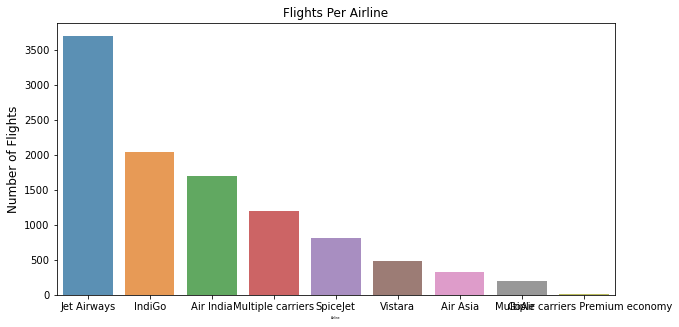

In [123]:
AL  = df['airline'].value_counts()
AL = AL[:9,]
plt.figure(figsize=(10,5))
sns.barplot(AL.index, AL.values, alpha=0.8)
plt.title('Flights Per Airline')
plt.ylabel('Number of Flights', fontsize=12)
plt.xlabel('Airline', fontsize=3)
plt.show()

## How does departure_period and arrival_period affect price? 


KeyboardInterrupt: 

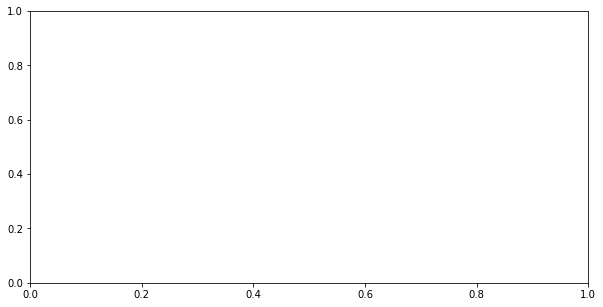

In [84]:


plt.figure(figsize=(10,5))
sns.stripplot(data = df, x = 'dep_hour', y = 'price', jitter = 0.4, size = 2, hue = 'price')
plt.ylim(0, 40000)
plt.show()

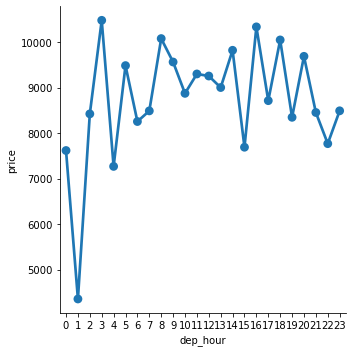

In [81]:
means = df.groupby('dep_hour', as_index = False).price.mean()
sns.catplot(x='dep_hour', y = 'price', data = means, kind= 'point', )
